# COVID-19 Vaccination Progress Around The World


## Introduction


The data contains the following information:

1. Country - this is the country for which the vaccination information is provided;
2. Country ISO Code - ISO code for the country;
3. Date- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
4. Total number of vaccin ations - this is the absolute number of total immunizations in the country;
5. Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
6. Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
7. Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;
8. Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
9. Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
10. Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
11. Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
12. Number of vaccinations per day - number of daily vaccination for that day and country;
13. Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
14. Vaccines used in the country - total number of vaccines used in the country (up to date);


Data Source - Kaggle;

Source website - https://www.kaggle.com/gpreda/covid-world-vaccination-progress/

In [135]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DATA PREPERATION AND CLEANING

In [137]:
df=pd.read_csv("country_vaccinations.csv")






#from datetime import datetime
#datetime.strptime(df["date"])

In [4]:
#df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)


df.date = pd.to_datetime(df.date,infer_datetime_format=True,format='%Y-%b-%d')

In [5]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   country                         1397 non-null   object        
 1   iso_code                        1240 non-null   object        
 2   date                            1397 non-null   datetime64[ns]
 3   total_vaccinations              919 non-null    float64       
 4   people_vaccinated               885 non-null    float64       
 5   daily_vaccinations              1337 non-null   float64       
 6   people_vaccinated_per_hundred   885 non-null    float64       
 7   daily_vaccinations_per_million  1337 non-null   float64       
 8   vaccines                        1397 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 98.4+ KB


In [128]:
df.describe()

,total_vaccinations,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.190000e+02,8.850000e+02,1.337000e+03,885.000000,1337.000000
mean,5.894958e+05,5.516406e+05,4.217337e+04,2.303085,1432.382947
std,1.857483e+06,1.673335e+06,1.116745e+05,4.548534,3120.828782
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000
25%,1.501150e+04,1.502300e+04,1.662000e+03,0.220000,262.000000
50%,6.282200e+04,6.075300e+04,5.512000e+03,0.800000,640.000000
75%,2.787140e+05,2.824500e+05,2.529900e+04,1.950000,1065.000000
max,2.053799e+07,1.739034e+07,1.057387e+06,28.860000,30869.000000


In [129]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'daily_vaccinations',
       'people_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines'],
      dtype='object')

In [130]:
df['iso_code'].fillna('GBR', inplace=True)

In [6]:
df.drop(["source_name","source_website","people_fully_vaccinated","daily_vaccinations_raw","total_vaccinations_per_hundred","people_fully_vaccinated_per_hundred"],axis=1, inplace=True)







# RAW VISUALIZATION OF 5 COUNTRIES

We will initialize the Python packages. we will use for data ingestion, preparation and visualization. We will use mostly seaborn for visualization. Then we read the data file and aggregate the data on few fields (country, iso_code and vaccines - that is the vaccination scheme used in a certain country).

In [153]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## 1. INDIA

In [154]:
India=df[df['iso_code']=='IND']

In [155]:
India

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
588,India,IND,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
589,India,IND,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
590,India,IND,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
591,India,IND,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
592,India,IND,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
593,India,IND,2021-01-20,806484.0,806484.0,NaN,131649.0,161297.0,0.06,0.06,NaN,117.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
594,India,IND,2021-01-21,1043534.0,1043534.0,NaN,237050.0,173922.0,0.08,0.08,NaN,126.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
595,India,IND,2021-01-22,1390592.0,1390592.0,NaN,347058.0,198656.0,0.10,0.10,NaN,144.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/
596,India,IND,2021-01-23,1582201.0,1582201.0,NaN,191609.0,198717.0,0.11,0.11,NaN,144.0,"Covaxin, Covishield",Ministry of Health,https://www.mohfw.gov.in/


In [156]:
plt.rc('font', size=12)

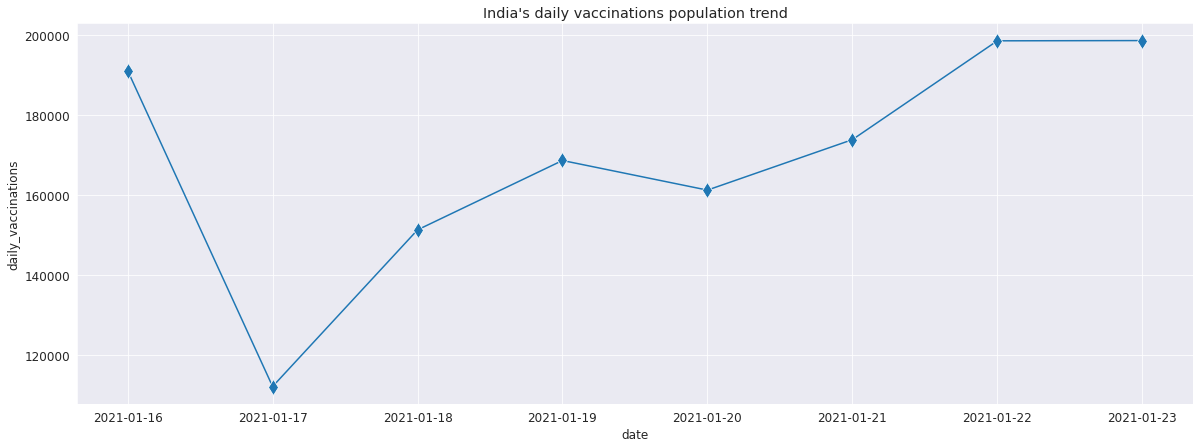

In [157]:
df_India = df[df["iso_code"] == 'IND'].copy()
plt.figure(figsize=(20,7))



sns.lineplot(data=df_India,x="date",y="daily_vaccinations",marker='d',markersize= 12)
plt.title("India's daily vaccinations population trend")
plt.show();

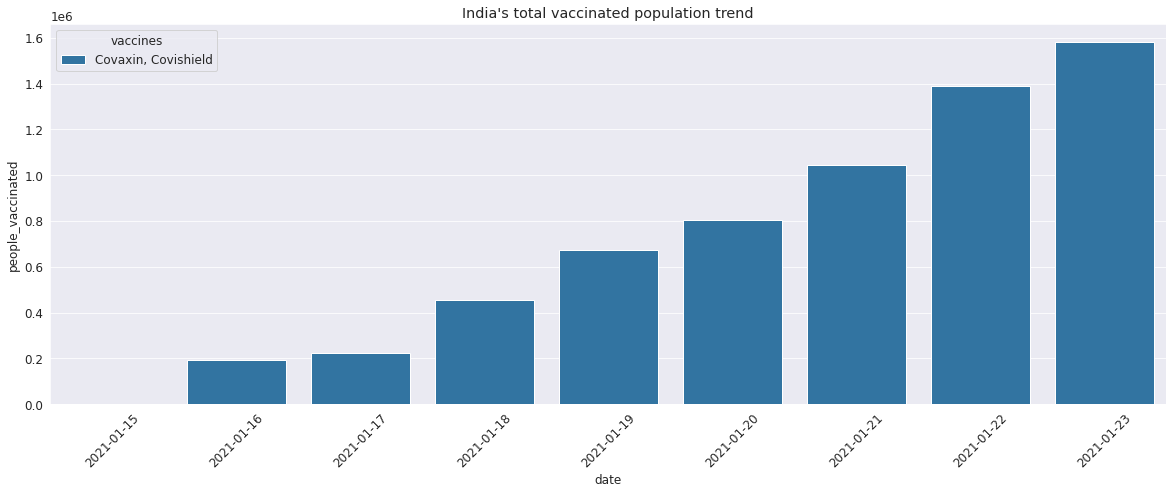

In [158]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_India, y="people_vaccinated",x="date",hue = 'vaccines')

plt.title("India's total vaccinated population trend")
plt.xticks(rotation=45);

## 2. CHINA

In [159]:
df_China = df[df["iso_code"] == 'CHN'].copy()
df_China

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
205,China,CHN,2020-12-15,1500000.0,1500000.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
206,China,CHN,2020-12-16,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
207,China,CHN,2020-12-17,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
208,China,CHN,2020-12-18,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
209,China,CHN,2020-12-19,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
210,China,CHN,2020-12-20,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
211,China,CHN,2020-12-21,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
212,China,CHN,2020-12-22,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
213,China,CHN,2020-12-23,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...
214,China,CHN,2020-12-24,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"CNBG, Sinovac",National Health Commission,https://www.globaltimes.cn/page/202101/1213364...


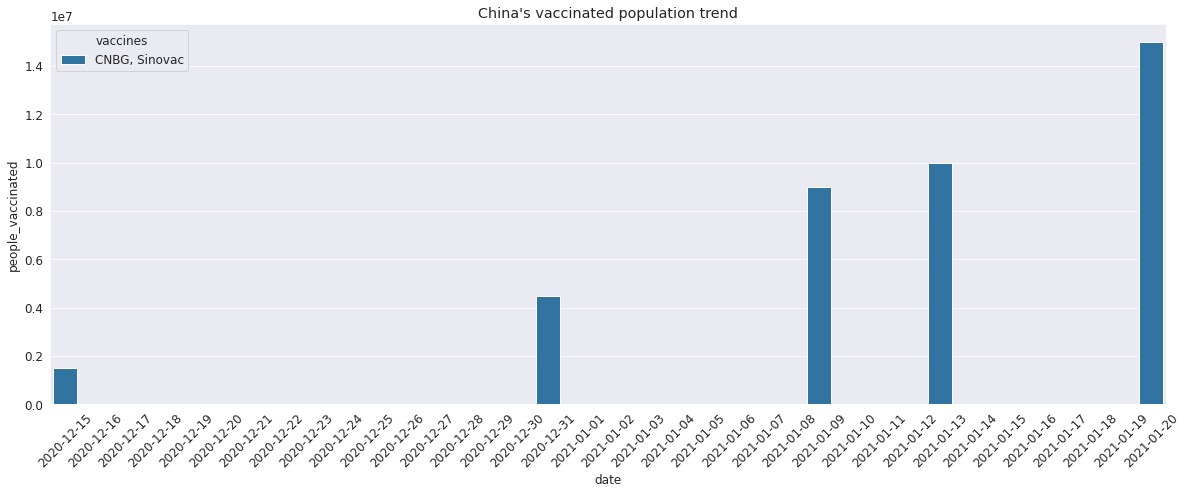

In [160]:

plt.figure(figsize=(20,7))


sns.barplot(data=df_China,x="date",y="people_vaccinated", hue = 'vaccines')


plt.xticks(rotation=45);
plt.title("China's vaccinated population trend");


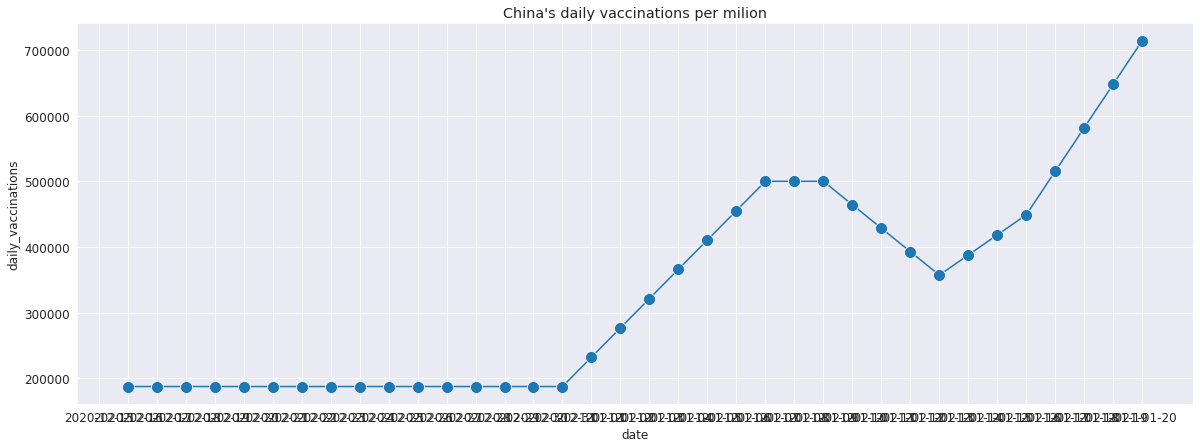

In [161]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_China,x="date",y="daily_vaccinations",marker='o',markersize =12);

plt.title("China's daily vaccinations per milion");

## 3. UNITED KINGDOM

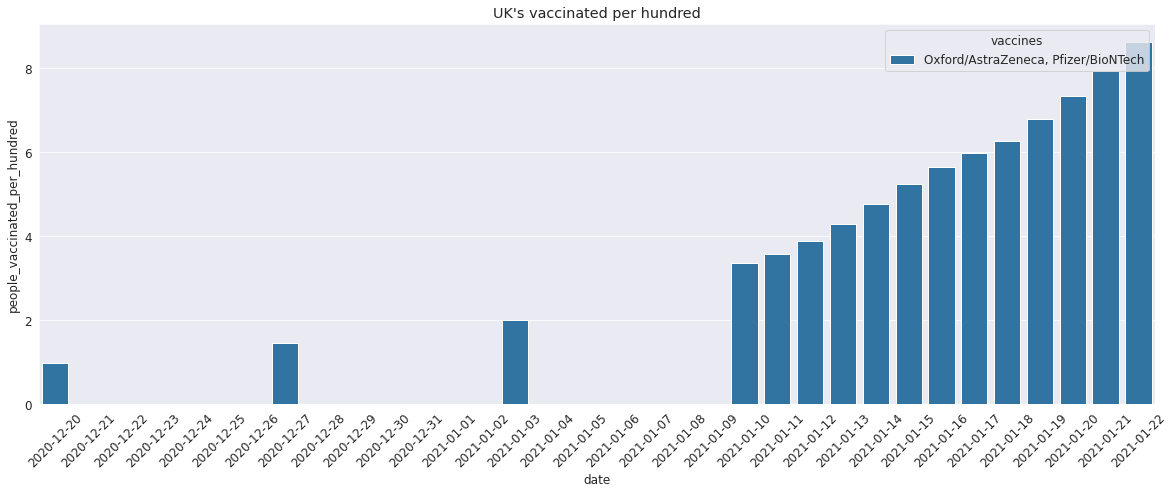

In [162]:
df_UK= df[df["iso_code"] == 'GBR'].copy()
plt.figure(figsize=(20,7))
sns.barplot(data=df_UK,x="date",y="people_vaccinated_per_hundred", hue = 'vaccines')

plt.xticks(rotation=45);

plt.title("UK's vaccinated per hundred")
plt.show();

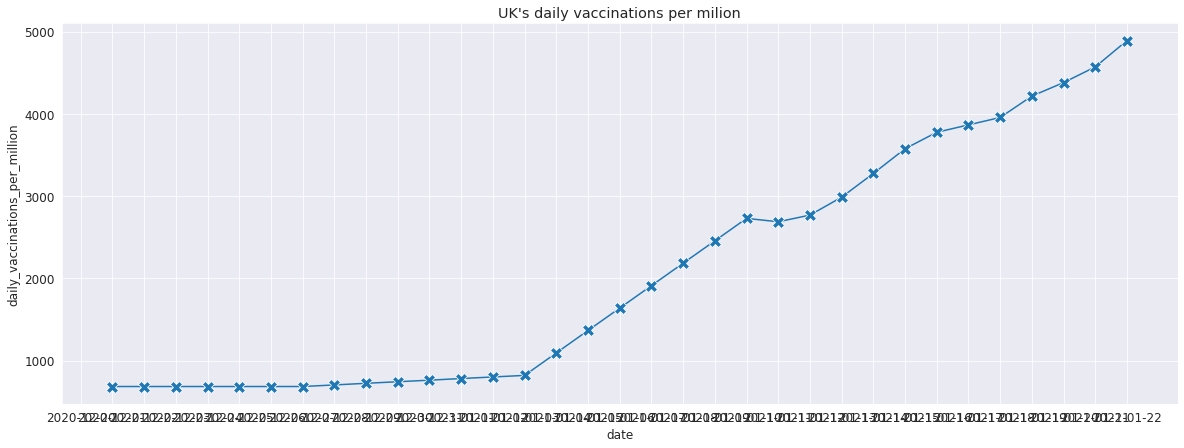

In [163]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_UK,x="date",y="daily_vaccinations_per_million",marker='X',markersize =12);

plt.title("UK's daily vaccinations per milion");

## 4. UNITED STATES of AMERICA

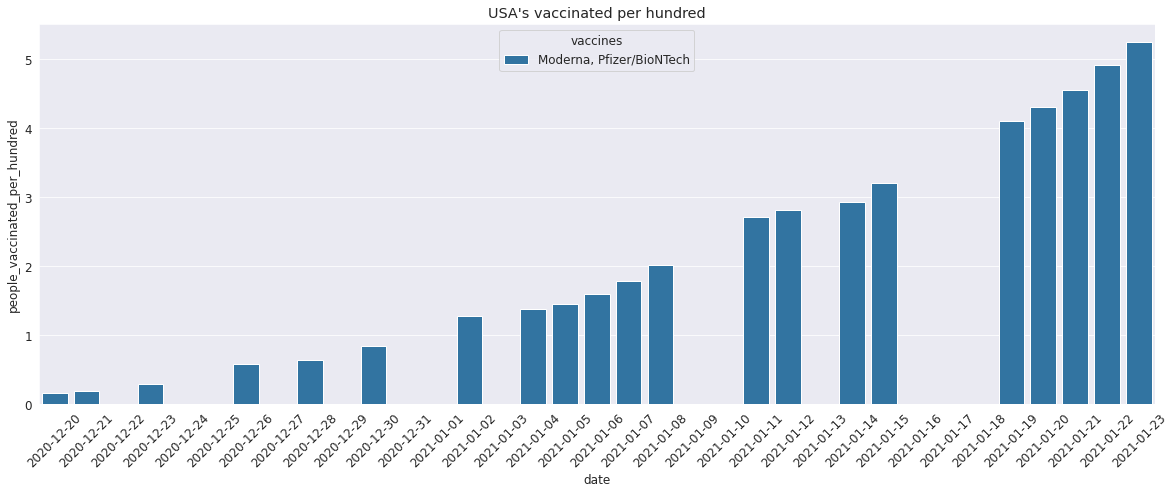

In [164]:
df_USA = df[df["iso_code"] == 'USA'].copy()
plt.figure(figsize=(20,7))
sns.barplot(data=df_USA,x="date",y="people_vaccinated_per_hundred", hue = 'vaccines')
plt.title("USA's vaccinated per hundred")

plt.xticks(rotation=45);

plt.show();

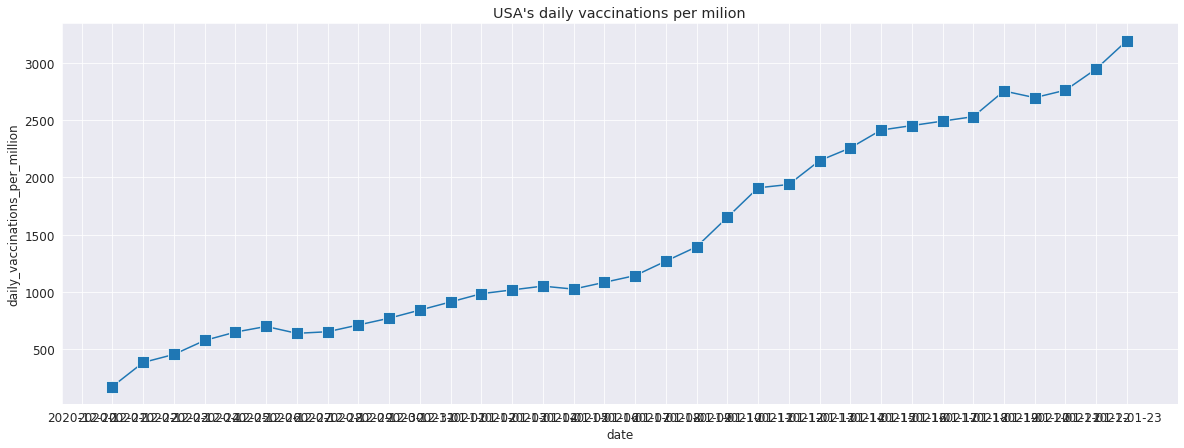

In [165]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_USA,x="date",y="daily_vaccinations_per_million",marker='s', markersize = 12);

plt.title("USA's daily vaccinations per milion");

# 5. RUSSIA

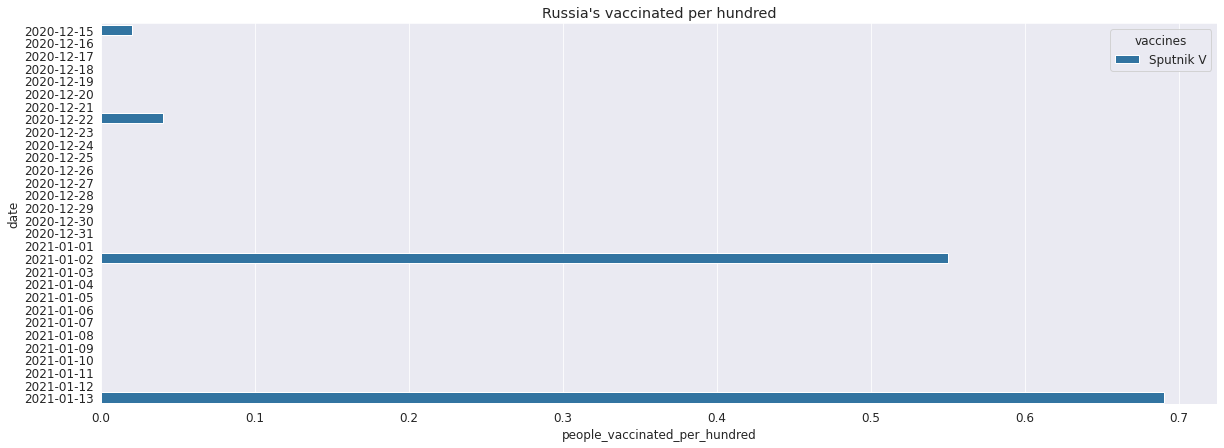

In [166]:
df_Russia = df[df["iso_code"] == 'RUS'].copy()
plt.figure(figsize=(20,7))
sns.barplot(data=df_Russia,y="date",x="people_vaccinated_per_hundred", hue = 'vaccines')

plt.title("Russia's vaccinated per hundred")
plt.show();

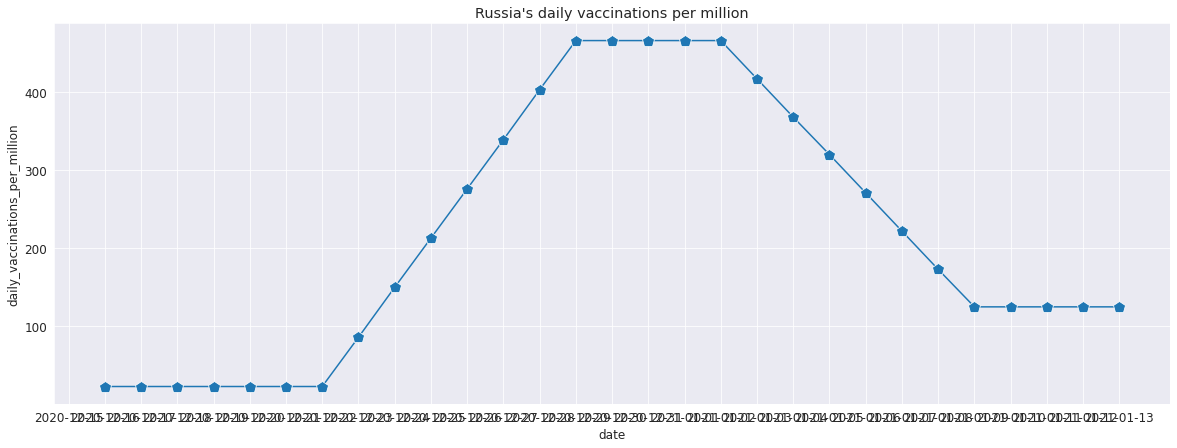

In [167]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_Russia,x="date",y="daily_vaccinations_per_million",marker='p', markersize = 12);

plt.title("Russia's daily vaccinations per million");

# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

# **1. Comparision of countries developing vaccine**

In [168]:
df_developed = df[(df["country"]=="United States") |(df["country"]=="China")|(df["country"]=='United Kingdom') |(df["country"]=='Russia')|(df["country"]=='India')]

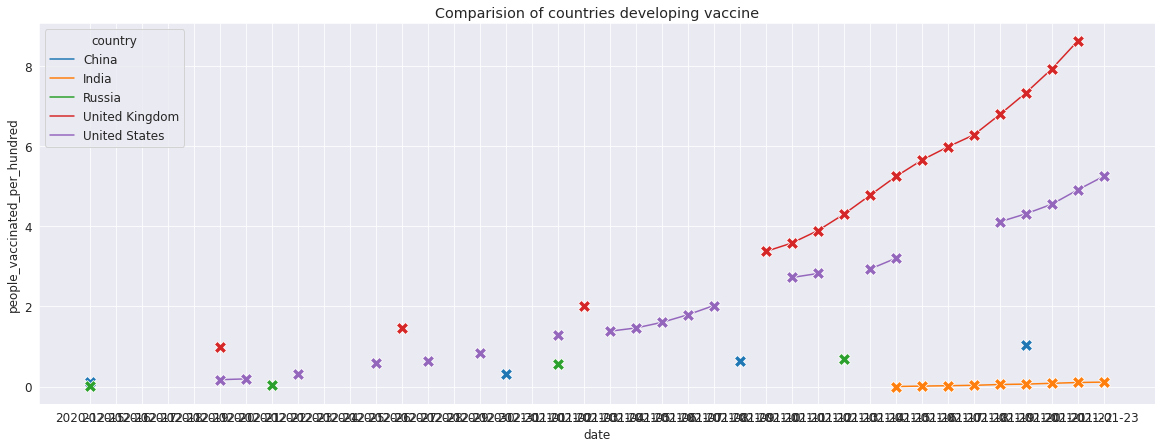

In [169]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_developed,x="date",y="people_vaccinated_per_hundred",marker='X',markersize = 12,hue="country")

plt.title('Comparision of countries developing vaccine')
plt.show()

# **2. Total people vaccinated per country**

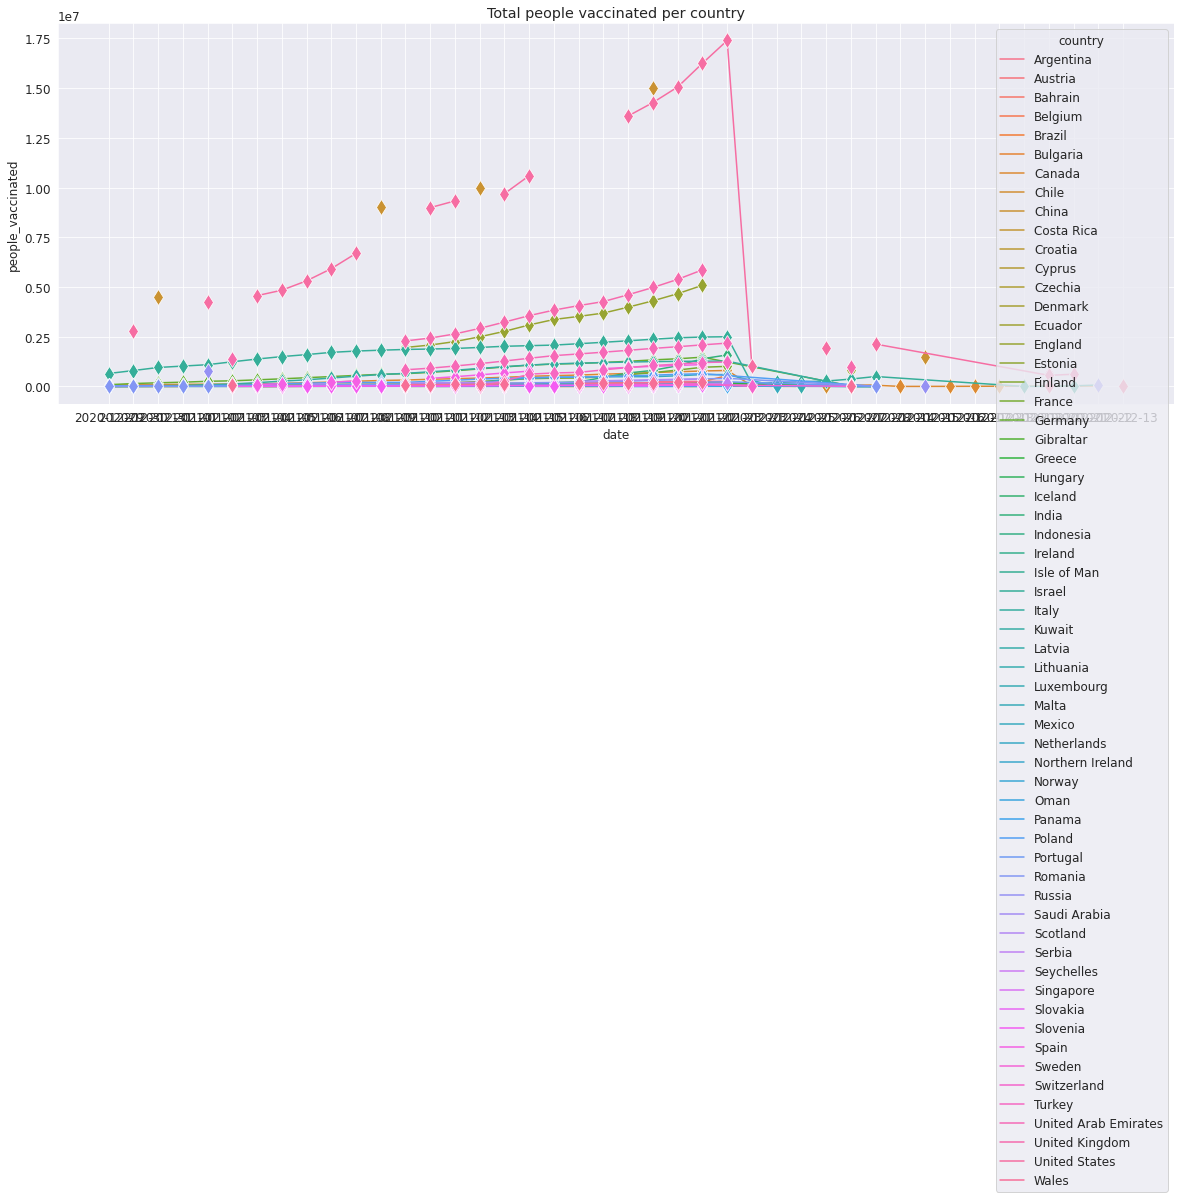

In [170]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="date",y="people_vaccinated",marker='d',markersize = 12,hue="country")

plt.title('Total people vaccinated per country')
plt.show()

# **3. Categories of vaccines offered**

<ipython-input-175-51fb1f796ffd>:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  vaccine.percent = vaccine.total_vaccinations_per_hundred*100


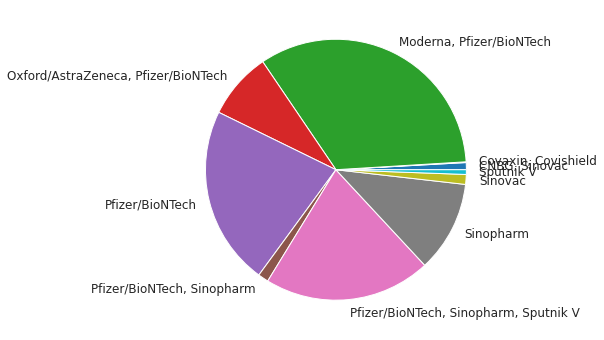

In [175]:
v_lables = ['CNBG, Sinovac',
            'Covaxin, Covishield',
                 'Moderna, Pfizer/BioNTech',
      'Oxford/AstraZeneca, Pfizer/BioNTech',
                          'Pfizer/BioNTech',
               'Pfizer/BioNTech, Sinopharm',
    'Pfizer/BioNTech, Sinopharm, Sputnik V',
                                'Sinopharm',
                                  'Sinovac',
                               'Sputnik V']


vaccine = df.groupby(["vaccines"])['total_vaccinations_per_hundred'].max().reset_index()



vaccine.percent = vaccine.total_vaccinations_per_hundred*100


plt.pie('total_vaccinations_per_hundred',labels = v_lables, data = vaccine);

### This chart below is extra

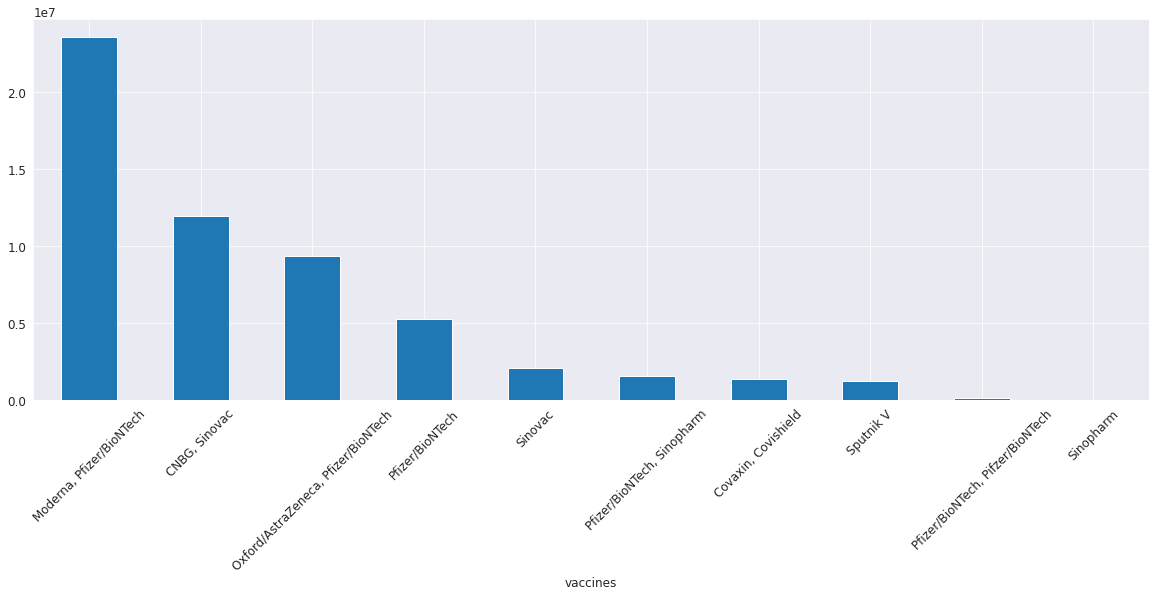

In [171]:
plt.figure(figsize=(20,7))
df_vaccines = df[["country","daily_vaccinations","vaccines"]].copy()
df_group = df_vaccines.groupby("vaccines")["daily_vaccinations"].sum()
df_group = df_group.sort_values(ascending=False).plot.bar()

#plt.bar(data = df_vaccines, x=vaccines, y = daily_vaccinations, hue = country)

plt.xticks(rotation=45);

# 4. Which country is using what vaccine and how much is population is                      vaccinated?

In [172]:
count_df = df.groupby(['iso_code'])['vaccines'].max().reset_index()

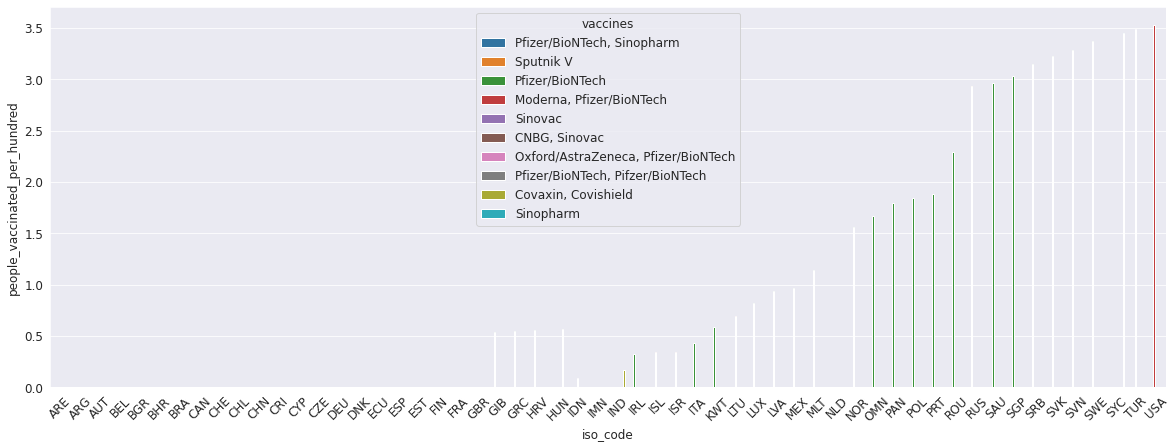

In [173]:
plt.figure(figsize=(20,7))

df.sort_values('people_vaccinated_per_hundred')
sns.barplot(x = count_df.iso_code, y= df['people_vaccinated_per_hundred'], hue= count_df.vaccines);

plt.xticks(rotation=45);

# Inferences and Conclusion

From the above analysis and visualizations we can conclude that:
1) Many countries stated applying vaccines to their people by the end of 2020, whereas India started its vaccination programme from 15th Jan, 2021.

2) The rate of applying vaccines to the patients is highest in UK, whereas it is lowest in India. One of the reasons the rate of vaccine reaching people is low could be because **India is a developing country**.

3) **Moderna, Pfizer/BioNTech** is the most popular vaccine used worldwide, since it has almost negligible side effects (known till date). Also India uses **Covaxin, Covishield** for vaccinating its subjects.

4) Maximum number of people vaccinated is highest in USA since USA is a developed nation as well as it has better health facalities than other developing nations.

From the above inferences it can be concluded that people from all the parts of the world are educating themselves and willingly taking the vaccines in most parts of the world. Also these vaccines have been proved effective against COVID-19 (till now). If the rate of people taking the vaccine continues to grow then all the countries can vaccinate their people before the end of this year. 

# References and Future Work

By using this dataset we can compare the number of deaths before people taking vaccines vs after taking vaccines to ckeck the effectiveness of each vaccine on each country.

Resources :

1) Dataset : https://www.kaggle.com/gpreda/covid-world-vaccination-progress

2) Jovian Course : https://www.zerotopandas.com

3) DateTime library documentation : https://docs.python.org/3/library/datetime.html

4) Matplotlib documentation : https://matplotlib.org/3.1.1/contents.html

5) Tutorialspoint : https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

6) Seaborn documentation : https://seaborn.pydata.org/introduction.html

7) Pandas documentation : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.items.html

8) pie charts in matplotlib (w3schools) : https://www.w3schools.com/python/matplotlib_pie_charts.asp

### **I shall soon add the link to my medium blog, stay tuned!**

**Peace.**